In [148]:
import hickle as hkl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import colorcet as cc
sns.set(style = "darkgrid")

In [159]:
domain = 'sq'
names = ['pressure', 'velocity', 'vorticity', 'divergence']
fields = {}
for name in names:
  data = hkl.load(f'{domain}_{name}.hkl')
  mesh = hkl.load(f'{domain}_{name}_mesh.hkl')
  fields[name] = {'data': data, 'mesh': mesh}
t = hkl.load(f't.hkl')

/usr/local/lib/python3.7/dist-packages/hickle/hickle.py:556: UserWarning: Input argument 'file_obj' appears to be a file made with hickle v3. Using legacy load...
  warnings.warn("Input argument 'file_obj' appears to be a file made"


In [160]:
def plot_surfaces(name, surfaces, ax=None):
  if ax is None:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel(name)
  mesh = fields[name]['mesh']
  data = fields[name]['data']
  for i, fn in enumerate(surfaces):
    ax.scatter(mesh[:,0], mesh[:,1], fn(mesh, data), color=cc.glasbey[i])

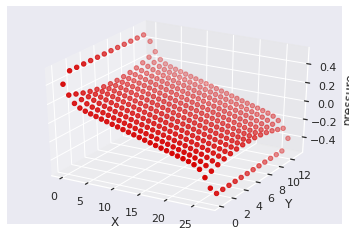

In [161]:
plot_surfaces('pressure', surfaces=[lambda mesh, data: data[-1]])

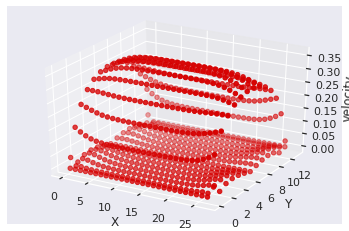

In [162]:
plot_surfaces('velocity', surfaces=[lambda mesh, data: np.abs(data[-1])])

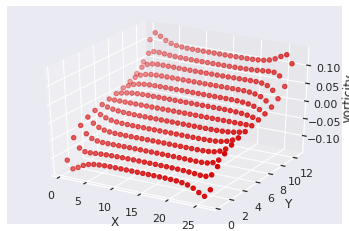

In [163]:
plot_surfaces('vorticity', surfaces=[lambda mesh, data: data[-1]])

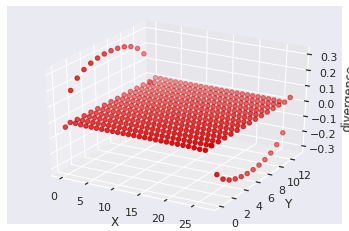

In [164]:
plot_surfaces('divergence', surfaces=[lambda mesh, data: data[-1]])

In [154]:
def poiseuille_analytic(mesh, viscosity=1.0, p_grad=1.0):
  ymin, ymax = mesh[:, 1].min(), mesh[:, 1].max()
  height = ymax - ymin
  return (p_grad / (2 * viscosity)) * mesh[:, 1] * (height - mesh[:, 1])

def clip_na(arr, min=-float('inf'), max=float('inf')):
  arr[arr < min] = np.nan
  arr[arr > max] = np.nan
  return arr

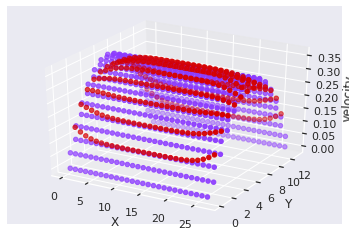

In [155]:
plot_surfaces('velocity', surfaces=[
  lambda mesh, data: clip_na(np.abs(data[-1]), min=0.05),
  lambda mesh, data: poiseuille_analytic(mesh, viscosity=61.0, p_grad=1.0)
])

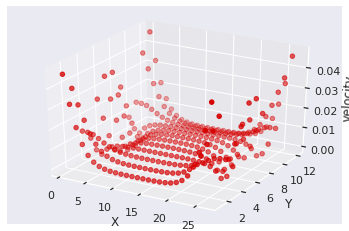

In [156]:
plot_surfaces('velocity', surfaces=[
  lambda mesh, data: np.abs(
      poiseuille_analytic(mesh, viscosity=61.0, p_grad=1.0) -
      clip_na(np.abs(data[-1]), min=0.05)
  )
])